In [1]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/hpc/projects/group.quake/doug/bulk_seq/sorted_Microglia_bulk.csv', index_col=0)

metadata_list = [col.split('_') for col in df.columns]

metadata_list = [x if len(x) == 4 else x + ['Unknown']*(4-len(x)) for x in metadata_list]

metadata_df = pd.DataFrame(metadata_list, columns=['celltype', 'Age', 'Region', 'Replicate','Extra'], index=df.columns)
metadata_df = metadata_df.drop('Extra',axis=1)

adata = sc.AnnData(X=df.T)  # Transpose since AnnData expects cells as rows, genes as columns
adata.obs = metadata_df

adata.var.index = df.index

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.obs['Age'] = adata.obs['Age'].str.replace('xM', '').astype(int)

In [2]:
neurop_full = ['Axl','Cd9','Csf1r','Hif1a','Itgax','Tmem163','Apoe','Cybb','Lilr4b','Lgals3']

DAM = ['Trem2','Apoe','Tyrobp','Itgax','Clec7a','Lpl','Cst7','Spp1','Axl','Cd9']

Act_score = ['B2m','Trem2','Ccl2','Apoe','Axl','Itgax','Cd9','C1qc','Lyz2','Ctss']

senescence = ['Ccl2','Tgfb1','Il1b','Mmp3','Ccl5','Cxcl10','Serpine1','Cdkn2a','Glb1','Tnf','Il6','Cdkn1a']

anti_senescence = ['Cdk4','Rb1','Cdk2','Lmnb1','Mki67','Cdk6']

LDAM = ['Slc25a5', 'Npl', 'Angptl7','Pde2a','Ldhb','Cd63','Sepp1','Sdcbp','Adipor1','Rbbp4','Cndp2','Hsd17b4','Gpd11','Dazap2','Hnmpk','Rapsn','Cat','Kl','Nampt','Acsl1','Dpyd','Cd163']

interest = ['Cdk2',
 'Cxcl2',
 'Slamf9',
 'Arhgap5',
 'Ctss',
 'Atp2a3',
 'H2-K1']

In [3]:
sc.tl.score_genes(adata,gene_list=DAM,score_name='DAM')
sc.tl.score_genes(adata,gene_list=Act_score,score_name='actscore')
sc.tl.score_genes(adata,gene_list=senescence,score_name='senescence')
sc.tl.score_genes(adata,gene_list=anti_senescence,score_name='anti_senescence')
sc.tl.score_genes(adata,gene_list=LDAM, score_name = 'LDAM')
sc.tl.score_genes(adata,gene_list=neurop_full,score_name='neurop')
sc.tl.score_genes(adata,gene_list=interest,score_name='interest')

In [4]:
def plot_boxplot_by_age_region(adata, score_name, output_pdf_path=None):
    """
    Plot a boxplot of the score split by age and hue'd by region, and optionally save it to a PDF.
    
    Parameters:
    - adata: AnnData object containing the data.
    - score_name: The name of the score to be plotted (must be present in adata.obs).
    - output_pdf_path: Optional. If provided, the plot will be saved to this path as a PDF.
    
    Returns:
    - A boxplot split by 'Age' and hue'd by 'Region', displayed on screen or saved as a PDF.
    """
    # Ensure the score is in adata.obs
    if score_name not in adata.obs.columns:
        raise ValueError(f"{score_name} not found in adata.obs columns.")
    
    # Create a DataFrame from adata.obs with relevant columns
    plot_data = adata.obs[['Age', 'Region', score_name]].copy()
    
    # Plot the boxplot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_data, x='Age', y=score_name, hue='Region')
    
    # Customize plot labels and title
    plt.title(f'Boxplot of {score_name} split by Age and Region')
    plt.xlabel('Age')
    plt.ylabel(f'{score_name} Score')
    plt.legend(title='Region')
    
    # Check if output_pdf_path is provided; if so, save the plot to the PDF
    if output_pdf_path:
        plt.savefig(output_pdf_path, format='pdf')
        print(f"Plot saved to {output_pdf_path}")
    
    # Show the plot
    plt.show()

    # Optionally, close the plot to avoid memory issues if used in a loop or script
    plt.close()

Plot saved to neurop_score.pdf


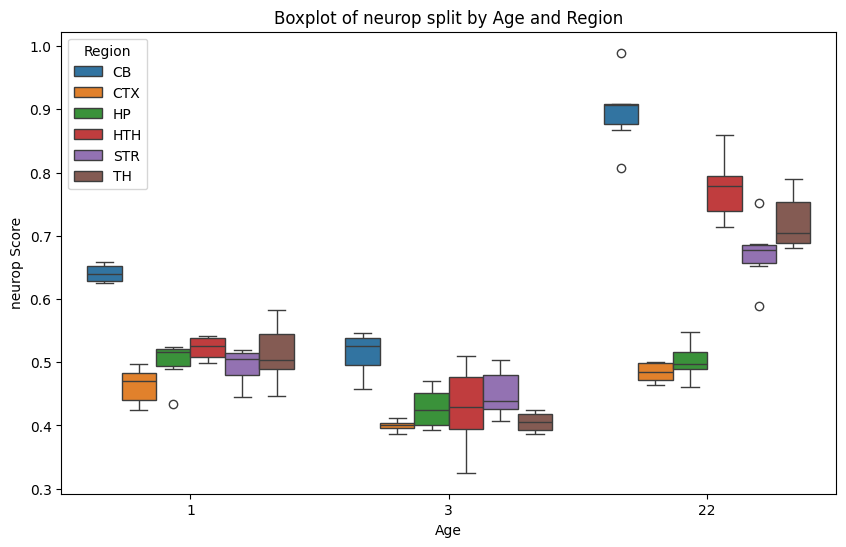

In [5]:
plot_boxplot_by_age_region(adata,'neurop',output_pdf_path='neurop_score.pdf')

Plot saved to DAM.pdf


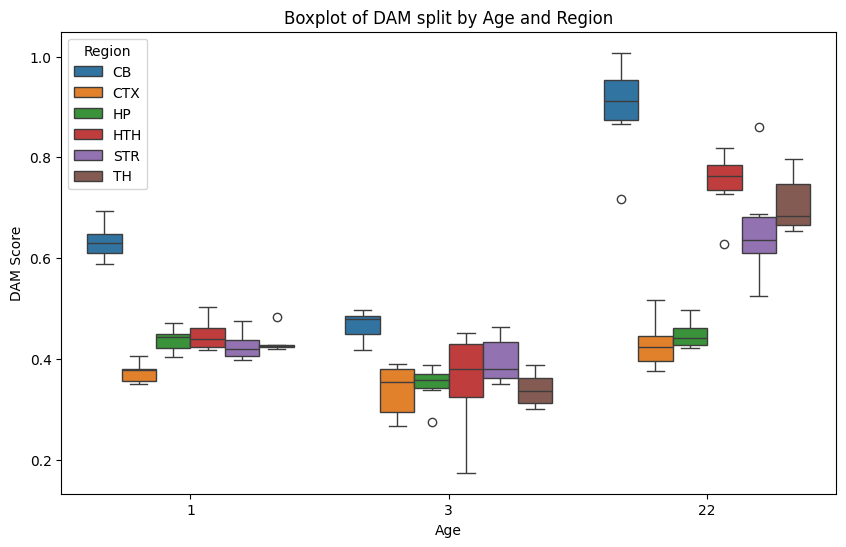

In [6]:
plot_boxplot_by_age_region(adata,'DAM',output_pdf_path='DAM.pdf')

Plot saved to actscore.pdf


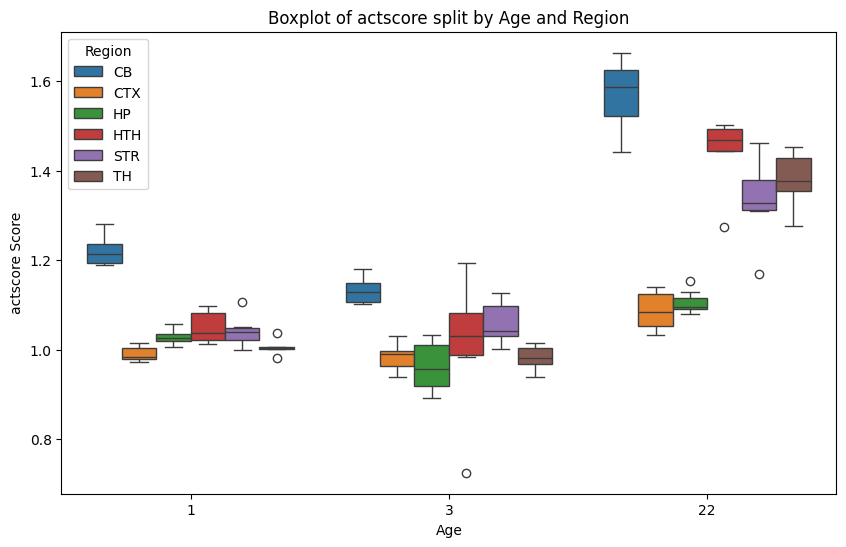

In [7]:
plot_boxplot_by_age_region(adata,'actscore',output_pdf_path='actscore.pdf')

Plot saved to senescence.pdf


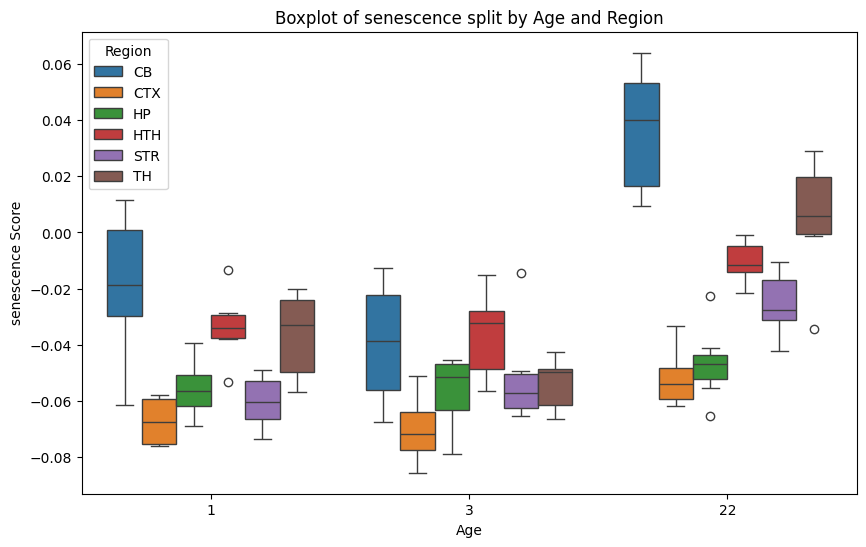

In [8]:
plot_boxplot_by_age_region(adata,'senescence',output_pdf_path='senescence.pdf')

Plot saved to anti_senescence.pdf


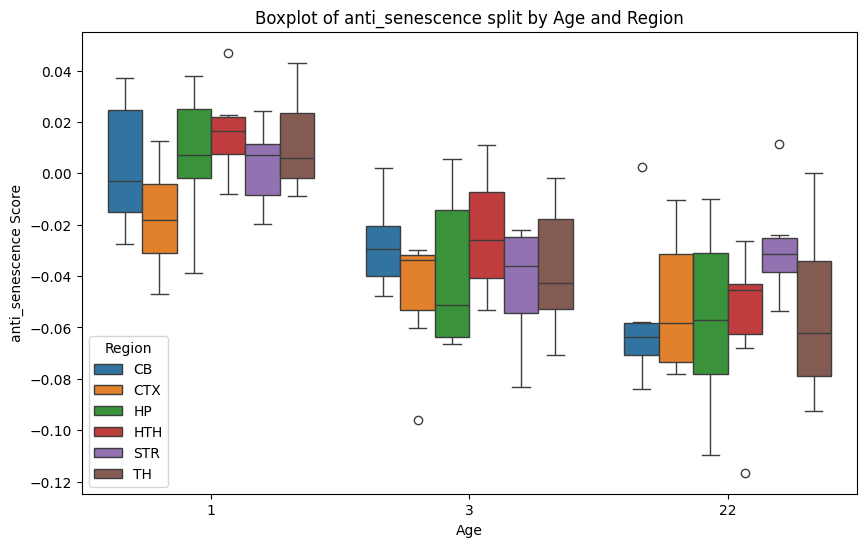

In [9]:
plot_boxplot_by_age_region(adata,'anti_senescence',output_pdf_path='anti_senescence.pdf')

Plot saved to LDAM_score.pdf


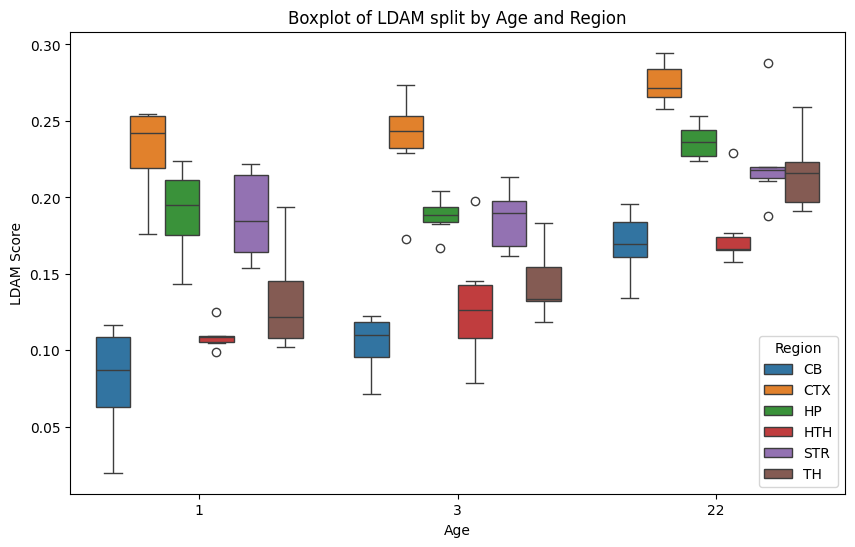

In [10]:
plot_boxplot_by_age_region(adata,'LDAM',output_pdf_path='LDAM_score.pdf')

Plot saved to MERFISH_score.pdf


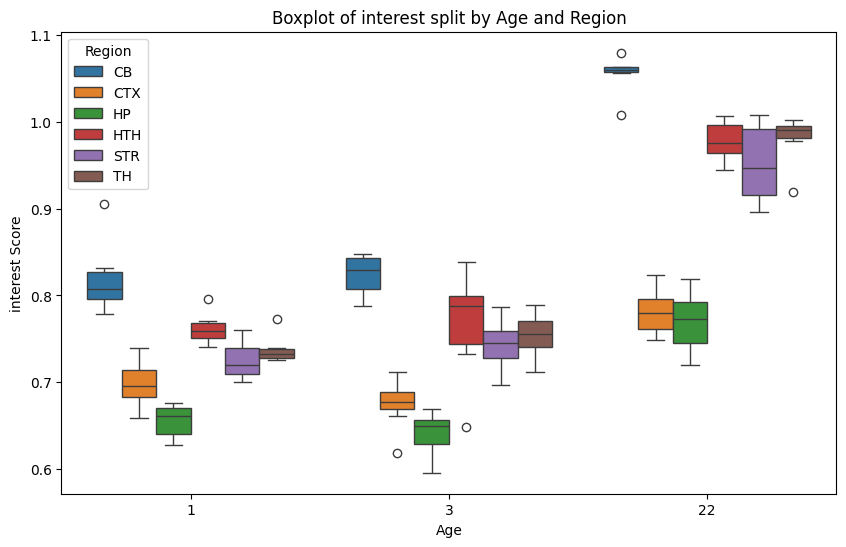

In [11]:
plot_boxplot_by_age_region(adata,'interest',output_pdf_path='MERFISH_score.pdf')